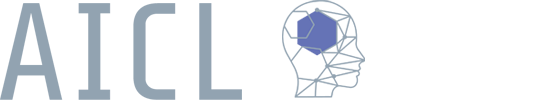

# Projekt za modul: Uvod u podatkovnu znanost

- **Autor: Davorin Špičko**
- **Predavač: Igor Buzov**
- **Cilj: Istražiti koje varijable utječu na iznos odobrenja kredita.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from utils import obrazovanje_value

In [2]:
banka = pd.read_csv("projektbanka.csv")

## Osnovna analiza

In [3]:
banka.head()

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,muško,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,žensko,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,muško,podstanar,magisterij
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,f,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,NaN,2.0,f,podstanar,SSS


Dataset se sastoji od **12 varijabli**, od kojih su tri definirane **nominalnom mjernom skalom** i to jednom prostornom (Država) te dvije **atributivnim mjernim skalama (Spol i Stambeni_Status)**. U datasetu također postoji i **jedna varijabla** predočena **redosljednom mjernom skalom (Obrazovanje)**.
U datasetu ne prepoznajemo varijable koje možemo opisati intervalnom mjernom skalom, no postoji osam varijabli koje možemo prikazati na omjernoj mjernoj skali. Od tih **osam varijabli**, **Starost_Klijenta**, **Staž_Godine**, **Godine_Kreditne_Povijesti** i **Broj_članova_Kućanstva** definirane su **diskretnim numeričkim vrijednostima**, dok su ostale četiri definirane **kontinuiranim numeričkim vrijednostima (ID_Klijenta, Odobreni_Iznos_EUR, Mjesečna_Primanja_EUR, Trenutni_Dug_EUR)**.

In [4]:
banka.describe()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanje_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Staž_Godine,Godine_Kreditne_Povijesti,Broj_članova_Kućanstva
count,2020.000000,2020.000000,1919.000000,1919.00000,1919.000000,1919.000000,1919.000000,1919.000000
mean,2000.603465,85929.815401,6694.880573,43534.26522,35.178739,15.392392,15.137051,2.647212
std,576.920116,19750.659531,1838.166648,5928.30992,9.854248,5.660518,8.801156,1.587254
min,1001.000000,20174.650000,1644.560000,0.00000,12.000000,0.000000,0.000000,-5.000000
25%,1502.750000,72694.725000,5467.530000,45000.00000,28.000000,11.000000,8.000000,1.000000
50%,2002.500000,85893.835000,6618.190000,45000.00000,35.000000,15.000000,15.000000,2.000000
75%,2498.250000,98722.072500,7935.160000,45000.00000,42.000000,19.000000,23.000000,4.000000
max,3000.000000,150000.000000,19246.942762,96932.52968,100.000000,37.000000,30.000000,9.000000


Za početak možemo primjetiti da imamo problem sa varijablom **Id_Klijenta**. Varijabla je vrijednost inkrementirana za 1 počevši od broja 1001. S obzirom da postoji 2020 zapisa (što vidimo iz vrijednosti *count*), maximalna vrijednost trebala bi biti 1001 + 2020 = 3021, dok ona iznosi 3000.
**Odobreni krediti** su u iznosima od 20175 do 150000 EUR pri čemu su prosjek 85930 i median 85894, što sugerira na normalnu distribuciju.
Raspon **mjesečnih primanja** iznosi od 1645 do 19247 pri čemu je prosjek 6695, medijan 6618 što bi sugeriralo da ne postoje extremne vrijednosti koje utječu na "pumpanje" srednje vrijednosti. 
Nadalje, **trenutni dug** je između 0 i 96933 EUR pri čemu je srednja vrijednost 43534, a median te prvi i drugi kvartil iznose 45000 što je uzapravo sumnjivo jer sugerira da postoje velika odstupanja ili ekstremne vrijednosti.
**Starost klijenata** kreće se od 12 do 100 godina, pri čemu su sumnjive vrijednosti manje od 18 kad osoba stječe zakonsko pravo skapanja poslovnih obaveza, te klijenti iznad 67 godina koji su u mirovini te su im smanjena primanja te postoji povećani rizik od smrtnosti i dovođenja ispate kredita u rizik.
**Godine staža** imaju sumnjivu vrijednost od minimalno 0 godina jer će teško koja banka odobriti kredit bez nekog od dokaza za mogućnost povrata kredita.
**Godine kreditne povijesti** kreću se u rasponu od 0 do 30 godina. 
**Broj članova** imaju problem sa minimalnim brojem članova od -5, dok je maksimalna vrijednost 9. U prosjeku u kućanstvu žive 3 osobe.

In [5]:
banka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2020 non-null   int64  
 1   Država                     2020 non-null   object 
 2   Odobreni_Iznos_EUR         2020 non-null   float64
 3   Mjesečna_Primanje_EUR      1919 non-null   float64
 4   Trenutni_Dug_EUR           1919 non-null   float64
 5   Starost_Klijenta           1919 non-null   float64
 6   Staž_Godine                1919 non-null   float64
 7   Godine_Kreditne_Povijesti  1919 non-null   float64
 8   Broj_članova_Kućanstva     1919 non-null   float64
 9   Spol                       1919 non-null   object 
 10  Stambeni_Status            1919 non-null   object 
 11  Obrazovanje                1919 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 189.5+ KB


Dataset se sastoji od **12 varijabli** dok **opseg statitstičkog skupa iznosi 2020**. 
Datasetu nedostaju vrijednosti na 101 obilježju, unutar sljedećih varijabli: **Mjesečna_Primanje_EUR, Trenutni_Dug_EUR, Trenutni_Dug_EUR, Starost_Klijenta, Staž_Godine, Godine_Kreditne_Povijesti, Broj_članova_Kućanstva, Spol, Stambeni_Status, Obrazovanje**. 
Većina obilježja opisana je decimalnim vrijednostima, osim **ID_Klijenta** koji je cjelobrojna vrijednost te ostale vrijednosti definirane u **Stringu(object)**.
Ukupno korištenje memorije je oko 190 KB.
Naziv varijable **Broj_članova_Kućanstva** odstupa od konvencije naziva ostalih stupaca (riječ članova je napisano malim početnim slovom) te ćemo radi jednostavnosti preimenovati taj stupac.

In [6]:
banka = banka.rename(columns={"Broj_članova_Kućanstva": "Broj_Članova_Kućanstva"})

In [7]:
banka.columns.to_list()

['ID_Klijenta',
 'Država',
 'Odobreni_Iznos_EUR',
 'Mjesečna_Primanje_EUR',
 'Trenutni_Dug_EUR',
 'Starost_Klijenta',
 'Staž_Godine',
 'Godine_Kreditne_Povijesti',
 'Broj_Članova_Kućanstva',
 'Spol',
 'Stambeni_Status',
 'Obrazovanje']

Također možemo vidjeti i sljedeće nepravilnosti "Mjesečna Primanje" -> "Mjesečna Primanja" (zatipak), "Staž Godine" -> "Godine_Staža" (redosljed riječi).

In [8]:
banka = banka.rename(columns={"Mjesečna_Primanje_EUR": "Mjesečna_Primanja_EUR"})

In [9]:
banka = banka.rename(columns={"Staž_Godine": "Godine_Staža"})

## Analiza kvalitativnih varijabli

Kako bi se pobliže upoznali sa kvalitativnim varijablama, prvo ćemo ih opisati kao što je već spomenuto u uvodu:
- Nominalna mjerna skala
    - Attributivne varijable
        - Spol
        - Stambeni_Status
    - Prostorne varijable
        - Država
- Redosljedna mjerna skala
    - Obrazovanje: Sukladno Zakonu o akademskom i stručnom nazivu i akademskom stupnju NN 123/2023, obrzovanje je moguće stupnjevati i time možemo dobiti redosljednu mjernu skalu koja može poslužiti za analizu tječe li stupanj obrazovanja na iznos kredita

Ponajprije se moramo upoznati sa brojem različitih vrijednosti za svaku od njih.

In [10]:
banka["Država"].value_counts()

Država
Hrvatska    2020
Name: count, dtype: int64

Svi podaci su vezani uz Republiku Hrvatsku te sa sigurnošću možemo reći da ta varijabla ne utječe na iznos dodjele kredita pa ćemo ju sukladno tome i ukloniti.

In [11]:
banka["Spol"].value_counts()

Spol
muško     725
M         418
m         365
f         221
žensko    190
Name: count, dtype: int64

Spol je napisan na nekoliko načina:
- muški spol: muško, M, m
- ženski spol: f, žensko
Jednostavnosti radi, sve vrijednosti koje opisuju **muški spol** pretvorit ćemo u vrijednost **M**, dok ćemo **ženski spol** pretvoriti u **F**. Pri tome očekujemo vrijednosti M = 1508 i F = 411.

In [12]:
banka["Stambeni_Status"].value_counts()

Stambeni_Status
podstanar    1169
vl            384
vlasnik       366
Name: count, dtype: int64

Postoje dvije vrijednosti za **Stambeni_Status**: **podstanar** i **vlasnik** pri čemu je vlasnik pogrešno unesen kao **vl** 284 puta pa ćemo te vrijednosti preimenovati u **vlasnik**. Pri tome očekujemo vrijednosti podstanar = 1169 i vlasnik = 750.

In [13]:
banka["Obrazovanje"].value_counts()

Obrazovanje
SSS           978
VSS           663
magisterij    278
Name: count, dtype: int64

Kod obrazovanja vidimo da postoje 3 kategorije, ali sukladno Zakonu o akademskom i stručnom nazivu i akademskom stupnju NN 123/2023, smatrati ćemo da se **magisterij** treba izjednačiti sa **VSS**. Pri tome očekujemo vrijednosti SSS = 978 i VSS = 941.

## Čišćenje podataka

### Popravljanje krivih unosa za kvalitativne varijable
Čišćenje podataka započet ću sređivanjem vrijednosti za spol, muški spol -> M, ženski spol -> F.

In [14]:
banka["Spol"] = banka["Spol"].replace({"muško": "M", "m": "M"})

In [15]:
banka["Spol"] = banka["Spol"].replace({"žensko": "F", "f": "F"})

In [16]:
banka["Spol"].value_counts()

Spol
M    1508
F     411
Name: count, dtype: int64

In [17]:
banka["Stambeni_Status"] = banka["Stambeni_Status"].replace({"vl": "vlasnik"})

In [18]:
banka["Stambeni_Status"].value_counts()

Stambeni_Status
podstanar    1169
vlasnik       750
Name: count, dtype: int64

In [19]:
banka["Obrazovanje"] = banka["Obrazovanje"].replace({"magisterij": "VSS"})

In [20]:
banka["Obrazovanje"].value_counts()

Obrazovanje
SSS    978
VSS    941
Name: count, dtype: int64

Nakon čišćenja imamo još sljedeću situaciju.

In [21]:
banka

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,M,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,F,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,M,podstanar,VSS
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,F,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,NaN,2.0,F,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2658,Hrvatska,111351.95,7401.28,27290.05,18.0,2.0,9.0,1.0,F,podstanar,SSS
2016,1873,Hrvatska,57413.62,3205.30,45000.00,18.0,0.0,8.0,6.0,F,podstanar,SSS
2017,2703,Hrvatska,97694.43,9542.15,45000.00,26.0,13.0,25.0,1.0,M,vlasnik,VSS
2018,1528,Hrvatska,85961.70,6112.71,45000.00,41.0,19.0,21.0,4.0,M,vlasnik,SSS


### Popravljanje ekstremnih vrijednosti
Prije popunjavanja vrijednosti koje nedostaju, popravit ćemo ekstremne vrijednosi kako ne bi krivo utjecale na iznose srednjih vrijednosti koje ćemo koristiti. Već u prvim koracima sa metodom describe() otkrili smo kako postoje ekstremne vrijednosti za **Starost_Klijenta** (min 12, max 100) i **Broj_Članova_Kućanstva** (min: -5).
Za **Starost_Klijenta** ekstremnim vrijednostima smatrat ćemo klijente mlađe od 18 godina jer osobe u Republici Hrvatskoj tek sa **18 godina** stječu punu pravnu i gospodarsku odgovornost te samim time možemo smatrati da nisu zadovoljavale kriterije za odobrenje kredita, te osobe starije od **65 godina** (to je dobna granica za odlazak žena u mirovinu).

<Axes: ylabel='Starost_Klijenta'>

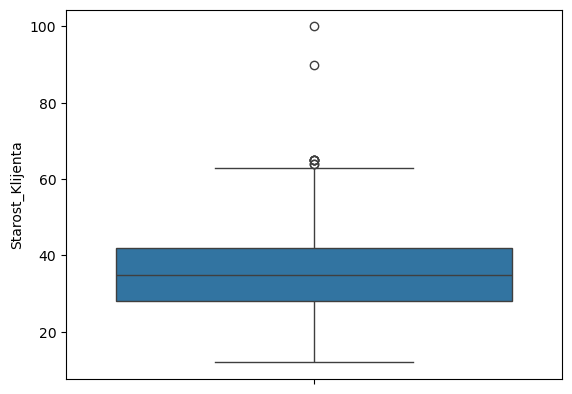

In [22]:
sns.boxplot(banka["Starost_Klijenta"])

In [23]:
banka[(banka["Starost_Klijenta"] < 18) | (banka["Starost_Klijenta"] > 65)]

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
161,1162,Hrvatska,100741.69,6956.03,45000.0,12.0,20.0,14.0,2.0,M,vlasnik,SSS
914,1915,Hrvatska,83094.09,6403.65,45000.0,12.0,18.0,18.0,4.0,M,vlasnik,VSS
1320,2321,Hrvatska,86133.00,7353.84,45000.0,12.0,15.0,2.0,1.0,M,podstanar,VSS
1640,2641,Hrvatska,85484.39,9092.16,45000.0,90.0,8.0,19.0,5.0,M,podstanar,VSS
1718,2719,Hrvatska,99189.04,6890.57,45000.0,100.0,17.0,NaN,4.0,M,podstanar,SSS


Dohvaćamo extremne vrijednosti za starost u obliku liste.

In [24]:
starost_extremne = banka[(banka["Starost_Klijenta"] < 18) | (banka["Starost_Klijenta"] > 65)]["Starost_Klijenta"].tolist()

S obzirom da smo vidjeli nekoliko klijenata sa istim brojem godina, rješavamo se duplikata pretvorbom u rječnik (riječnik ne može sadržavati duple ključeve) te pretvorba nazad u listu.

In [25]:
starost_extremne = list(dict.fromkeys(starost_extremne))

In [26]:
starost_extremne

[12.0, 90.0, 100.0]

I na kraju zamijenimo sve ove vrijednosti sa prosjekom.

In [27]:
for starost in starost_extremne:
    banka["Starost_Klijenta"] = banka["Starost_Klijenta"].replace({starost: banka["Starost_Klijenta"].mean()})

Ovime smo riješili ekstremne vrijednosti starosti klijenata, pa nastavljamo sa **brojem članova kućanstava**. Broj članova kućanstava ne može biti manji od **0**, pa ćemo ovdje imati samo donje ekstremne vrijednosti, s obzirom da smo sa metodom describe() utvrdili da je maximalan broj članova kućanstva **9** što je moguće.

<Axes: ylabel='Broj_Članova_Kućanstva'>

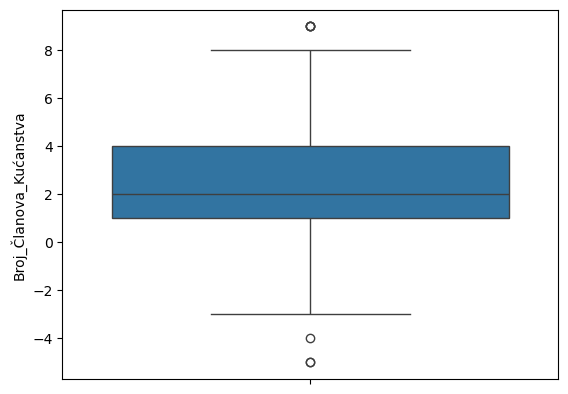

In [28]:
sns.boxplot(banka["Broj_Članova_Kućanstva"])

In [29]:
banka[banka["Broj_Članova_Kućanstva"] < 0]

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
45,1046,Hrvatska,70603.12,4499.32,45000.0,46.0,23.0,9.0,-3.0,M,podstanar,SSS
46,1047,Hrvatska,75787.22,5402.83,45000.0,35.0,13.0,5.0,-1.0,F,podstanar,SSS
545,1546,Hrvatska,69062.09,4896.30,45000.0,39.0,23.0,20.0,-5.0,M,vlasnik,SSS
810,1811,Hrvatska,81262.57,5795.75,45000.0,34.0,15.0,28.0,-4.0,M,podstanar,SSS
932,1933,Hrvatska,56039.72,4503.22,45000.0,NaN,10.0,22.0,-5.0,M,podstanar,SSS


Iako primjećujemo negativne vrijednosti, pretpostavit ćemo da je greška proizašla iz krivog predznaka jer same vrijednosti ne izgledaju nasumične pa ćemo za popravljanje koristiti njihovu apsolutnu vrijednost.

In [30]:
clanovi_extremne = banka[banka["Broj_Članova_Kućanstva"] < 0]["Broj_Članova_Kućanstva"].tolist()

In [31]:
clanovi_extremne = list(dict.fromkeys(clanovi_extremne))

In [32]:
clanovi_extremne

[-3.0, -1.0, -5.0, -4.0]

In [33]:
for broj in clanovi_extremne:
    banka["Broj_Članova_Kućanstva"] = banka["Broj_Članova_Kućanstva"].replace({broj: abs(broj)})

In [34]:
banka.describe()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva
count,2020.000000,2020.000000,1919.000000,1919.00000,1919.000000,1919.000000,1919.000000,1919.000000
mean,2000.603465,85929.815401,6694.880573,43534.26522,35.152651,15.392392,15.137051,2.665972
std,576.920116,19750.659531,1838.166648,5928.30992,9.618084,5.660518,8.801156,1.555522
min,1001.000000,20174.650000,1644.560000,0.00000,18.000000,0.000000,0.000000,1.000000
25%,1502.750000,72694.725000,5467.530000,45000.00000,28.000000,11.000000,8.000000,1.000000
50%,2002.500000,85893.835000,6618.190000,45000.00000,35.000000,15.000000,15.000000,2.000000
75%,2498.250000,98722.072500,7935.160000,45000.00000,42.000000,19.000000,23.000000,4.000000
max,3000.000000,150000.000000,19246.942762,96932.52968,65.000000,37.000000,30.000000,9.000000


Iako kreditiranje osoba sa 0 godina radnog staža izgleda sumnjivo, za ostvarenje kredita u tim iznosima (cca 20000EUR) dovoljne su zadnje 3 isplatne liste (primitka plaće na račun) te potvrda poslodavca o zaposlenju na neodređeno, tako da ćemo ove vrijednosti smatrati valjanima.
Sukladno tome, popravili smo sve ekstremne vrijednosti te možemo nastaviti sa popravljanjem vrijednosti koje nedostaju. Pri tome ćemo se dva puta rješavati duplikata - prije i nakon popunjavanja.

### Uklanjanje duplikata
Ovo je prvo uklanjanje i vršimo ga prije popunjavanja vrijednosti koje nedostaju. Prije samom uklanjanja, provjerimo dali duplikati postoje.

In [35]:
banka.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2008 non-null   int64  
 1   Država                     2008 non-null   object 
 2   Odobreni_Iznos_EUR         2008 non-null   float64
 3   Mjesečna_Primanja_EUR      1907 non-null   float64
 4   Trenutni_Dug_EUR           1907 non-null   float64
 5   Starost_Klijenta           1907 non-null   float64
 6   Godine_Staža               1907 non-null   float64
 7   Godine_Kreditne_Povijesti  1907 non-null   float64
 8   Broj_Članova_Kućanstva     1907 non-null   float64
 9   Spol                       1907 non-null   object 
 10  Stambeni_Status            1907 non-null   object 
 11  Obrazovanje                1907 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 203.9+ KB


Iz ovoga je vidljivo da postoje duplikati. Micanje duplikata rezultirat će sa 2008 od ukupno 2020 trenutnih zapisa.

In [36]:
banka = banka.drop_duplicates()

### Popravljanje vrijednosti koje nedostaju

Korištenjem methode info() već smo utvrdili da postoji 101 zapis u svakoj varijabli, no to ćemo još potvrditi izlistavanjem None i NaN vrijednosti.

In [37]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR        101
Trenutni_Dug_EUR             101
Starost_Klijenta             101
Godine_Staža                 101
Godine_Kreditne_Povijesti    101
Broj_Članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

Za popunjavanje vrijednosti koristit ćemo različite metode. Koje ćemo opisivati putem kako ih primjenjujemo. Za početak koristit ćemo izračune srednjih vrijednosti, medijan i prosječnu vrijednost za Mjesečna_Primanja_EUR i Trenutni_Dug_EUR respektivno.

In [38]:
banka = banka.fillna({"Mjesečna_Primanja_EUR": banka["Mjesečna_Primanja_EUR"].median()})

In [39]:
banka = banka.fillna({"Trenutni_Dug_EUR": banka["Trenutni_Dug_EUR"].mean()})

Za starost klijenta koristit ćemo vlastitu funkciju koja će u ovisiti o još dvije varijable. Isto tako iz nje ćemo izvesti funkcije za izračun ostale dvije varijable. 

Za početak koristiti ćemo poznate vrijednosti za staž i obrazovanje za izračun starosti. Pri tome ćemo kao vrijednosti za **SSS** uzeti **19** (većina ljudi počinje raditi otprilike u godinu dana od završetka srednje škole, dok ćemo za **VSS** uzeti **25** što označava starost osobe koja počinje raditi nakon fakulteta.
\begin{equation}
Starost Klijenta = Staž Godine + Obrazovanje
\end{equation}

Nadalje, istu funkciju koristiti ćemo za izračun staža kod zapisa koji imaju starost, a obrazovanje će imati iste vrijednosti kao i u prethodnoj.

\begin{equation}
Staž Godine = Starost Klijenta - Obrazovanje
\end{equation}

Za preostale NA vrijednosti koristit ćemo **prosječnu vrijednost**.

In [40]:
for row_index in range(len(banka)):
    starost_col_index = list(banka.columns).index("Starost_Klijenta")
    starost = banka.iloc[row_index]["Starost_Klijenta"]
    staz = banka.iloc[row_index]["Godine_Staža"]
    obrazovanje = banka.iloc[row_index]["Obrazovanje"]
    if pd.isna(starost) and not pd.isna(staz) and not pd.isna(obrazovanje):
        banka.iloc[row_index, starost_col_index] = staz + obrazovanje_value(obrazovanje)

In [41]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               6
Godine_Staža                 101
Godine_Kreditne_Povijesti    101
Broj_Članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

Ostalih 6 zapisa riješit ćemo kao što smo prethodno napisali primjenom prosječne vrijednosti izražene u **cjelobrojnom iznosu**.

In [42]:
banka = banka.fillna({"Starost_Klijenta": int(banka["Starost_Klijenta"].mean())})

In [43]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               0
Godine_Staža                 101
Godine_Kreditne_Povijesti    101
Broj_Članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

Ponavljamo postupak za Godine_Staža i Obrazovanje.

In [44]:
for row_index in range(len(banka)):
    staz_col_index = list(banka.columns).index("Godine_Staža")
    starost = banka.iloc[row_index]["Starost_Klijenta"]
    staz = banka.iloc[row_index]["Godine_Staža"]
    obrazovanje = banka.iloc[row_index]["Obrazovanje"]
    if pd.isna(staz) and not pd.isna(starost) and not pd.isna(obrazovanje):
        staz = starost - obrazovanje_value(obrazovanje)
        banka.iloc[row_index, staz_col_index] = staz if staz >= 0 else 0

In [45]:
banka = banka.fillna({"Godine_Staža": int(banka["Godine_Staža"].mean())})

In [46]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               0
Godine_Staža                   0
Godine_Kreditne_Povijesti    101
Broj_Članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

**Godine kreditne povijesti** imaju nepredvidive duljine trajanja i iznose, nekima je kredina povijes počela sa studijem, nekima nekoliko godina nakon završetka obrazovanja, nekima po prvom zaposlenju kad su još bili zastupani od strane roditelja (npr trogodišnje srednje škole) i sl. Zbog toga ćemo jednostavno upotrijebiti **prosječnu vrijednost** za popunjavanje.

In [47]:
banka = banka.fillna({"Godine_Kreditne_Povijesti": int(banka["Godine_Kreditne_Povijesti"].mean())})

In [48]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               0
Godine_Staža                   0
Godine_Kreditne_Povijesti      0
Broj_Članova_Kućanstva       101
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

**Broj članova kućanstva** ne želimo računati pomoću srednjih vrijednosti kako bi raznolikost ostala što raznovrsnija i potencijalno nam omogućila neku informaciju kasnije. Vrijednosti koje nedostaju popunit ćemo metodom **interpolacije**.

In [49]:
banka["Broj_Članova_Kućanstva"] = banka["Broj_Članova_Kućanstva"].interpolate()

In [50]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               0
Godine_Staža                   0
Godine_Kreditne_Povijesti      0
Broj_Članova_Kućanstva         0
Spol                         101
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

Slično je i za **spol**, ne postoji metrika koja bi nam ukazala na koji način možemo popuniti vrijednosti te u ovom slučaju ne želimo koristiti najčešću ili slučajnu vrijednost, već ćemo prepustiti pandasu da odradi popunjavanje putem metode **ffill** koja propagira prethodnu validnu vrijednost u sljedeću.

In [51]:
banka["Spol"] = banka["Spol"].ffill()

In [52]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               0
Godine_Staža                   0
Godine_Kreditne_Povijesti      0
Broj_Članova_Kućanstva         0
Spol                           0
Stambeni_Status              101
Obrazovanje                  101
dtype: int64

Isti princip primjenit ćemo na **Obrazovanju**, korištenje **ffill**.

In [53]:
banka["Obrazovanje"] = banka["Obrazovanje"].ffill()

In [54]:
banka.isna().sum()

ID_Klijenta                    0
Država                         0
Odobreni_Iznos_EUR             0
Mjesečna_Primanja_EUR          0
Trenutni_Dug_EUR               0
Starost_Klijenta               0
Godine_Staža                   0
Godine_Kreditne_Povijesti      0
Broj_Članova_Kućanstva         0
Spol                           0
Stambeni_Status              101
Obrazovanje                    0
dtype: int64

Preostala nam je varijabla **Stambeni_Status** koju ćemo popuniti na sljedeći način. S obzirom da je **maksimalni iznos nenamjenskog kredita** u većini banaka u **Republici Hrvatskoj 40.000,00 EUR**, pogledat ćemo zaduženje pojedinog klijenta te ako je odobreni iznos veći od 40.000,00 EUR, pretpostavit ćemo da se radi u stambenom kreditu kojeg je klijent uzeo za **kupnju nekretnine** te tako postao njezinim **vlasnikom**. Sve ostale vrijednosti **Stambenog_Statusa** popunit ćemo vrijednošću **podstanar**.

In [55]:
for row_index in range(len(banka)):
    stambeni_status_col_index = list(banka.columns).index("Stambeni_Status")
    kredit = banka.iloc[row_index]["Odobreni_Iznos_EUR"]
    status = banka.iloc[row_index]["Stambeni_Status"]
    if pd.isna(status):
        banka.iloc[row_index, stambeni_status_col_index] = "vlasnik" if kredit > 40000 else "podstanar"

In [56]:
banka.isna().sum()

ID_Klijenta                  0
Država                       0
Odobreni_Iznos_EUR           0
Mjesečna_Primanja_EUR        0
Trenutni_Dug_EUR             0
Starost_Klijenta             0
Godine_Staža                 0
Godine_Kreditne_Povijesti    0
Broj_Članova_Kućanstva       0
Spol                         0
Stambeni_Status              0
Obrazovanje                  0
dtype: int64

In [57]:
banka

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28.0,12.0,9.0,2.0,M,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34.0,13.0,23.0,3.0,F,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27.0,11.0,16.0,2.0,M,podstanar,VSS
3,1004,Hrvatska,115460.60,9433.69,39059.44,32.0,17.0,30.0,4.0,F,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18.0,10.0,15.0,2.0,F,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2022,Hrvatska,73526.00,4534.17,45000.00,30.0,17.0,28.0,1.0,M,podstanar,SSS
2009,2133,Hrvatska,117274.23,8014.60,38649.07,18.0,9.0,26.0,4.0,F,vlasnik,SSS
2011,1015,Hrvatska,50501.64,6618.19,45000.00,43.0,17.0,2.0,4.0,F,vlasnik,SSS
2014,2258,Hrvatska,93380.38,8856.01,45000.00,28.0,9.0,0.0,4.0,M,vlasnik,SSS


In [58]:
banka.columns.to_list()

['ID_Klijenta',
 'Država',
 'Odobreni_Iznos_EUR',
 'Mjesečna_Primanja_EUR',
 'Trenutni_Dug_EUR',
 'Starost_Klijenta',
 'Godine_Staža',
 'Godine_Kreditne_Povijesti',
 'Broj_Članova_Kućanstva',
 'Spol',
 'Stambeni_Status',
 'Obrazovanje']

Nakon što smo popunili sve vrijednosti pretvorit ćemo vrijednosti koje su cijelobrojne u cjelobrojne, dok ćemo za decimalne brojeve smanjiti preciznost s obzrirom da su nam vrijednosti točne na 2 decimale.

In [59]:
banka.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2008 non-null   int64  
 1   Država                     2008 non-null   object 
 2   Odobreni_Iznos_EUR         2008 non-null   float64
 3   Mjesečna_Primanja_EUR      2008 non-null   float64
 4   Trenutni_Dug_EUR           2008 non-null   float64
 5   Starost_Klijenta           2008 non-null   float64
 6   Godine_Staža               2008 non-null   float64
 7   Godine_Kreditne_Povijesti  2008 non-null   float64
 8   Broj_Članova_Kućanstva     2008 non-null   float64
 9   Spol                       2008 non-null   object 
 10  Stambeni_Status            2008 non-null   object 
 11  Obrazovanje                2008 non-null   object 
dtypes: float64(7), int64(1), object(4)
memory usage: 203.9+ KB


In [60]:
cjelobrojne_varijable = ["ID_Klijenta", "Starost_Klijenta", "Godine_Staža", "Godine_Kreditne_Povijesti", "Broj_Članova_Kućanstva"]

In [61]:
for row_index in range(len(banka)):
    for col in cjelobrojne_varijable:
        col_index = list(banka.columns).index(col)
        value = banka.iloc[row_index][col]
        banka.iloc[row_index, col_index] = int(round(value))

In [62]:
banka[cjelobrojne_varijable] = banka[cjelobrojne_varijable].apply(pd.to_numeric, downcast='integer')

In [63]:
decimalne_varijable = banka.select_dtypes('float').columns

In [64]:
banka[decimalne_varijable] = banka[decimalne_varijable].apply(pd.to_numeric, downcast='float')

In [65]:
banka.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Klijenta                2008 non-null   int16  
 1   Država                     2008 non-null   object 
 2   Odobreni_Iznos_EUR         2008 non-null   float64
 3   Mjesečna_Primanja_EUR      2008 non-null   float64
 4   Trenutni_Dug_EUR           2008 non-null   float64
 5   Starost_Klijenta           2008 non-null   int8   
 6   Godine_Staža               2008 non-null   int8   
 7   Godine_Kreditne_Povijesti  2008 non-null   int8   
 8   Broj_Članova_Kućanstva     2008 non-null   int8   
 9   Spol                       2008 non-null   object 
 10  Stambeni_Status            2008 non-null   object 
 11  Obrazovanje                2008 non-null   object 
dtypes: float64(3), int16(1), int8(4), object(4)
memory usage: 137.3+ KB


Na kraju ćemo opet provesti uklanjanje duplikata ukoliko je donjih došlo prilikom popunjavanja podataka koji su nedostajali.

In [66]:
banka = banka.drop_duplicates()

In [67]:
banka.sort_values("ID_Klijenta")

,ID_Klijenta,Država,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
0,1001,Hrvatska,94934.28,5897.21,45000.00,28,12,9,2,M,podstanar,SSS
1,1002,Hrvatska,82234.71,5466.71,45000.00,34,13,23,3,F,podstanar,SSS
2,1003,Hrvatska,97953.77,9539.26,45000.00,27,11,16,2,M,podstanar,VSS
3,1004,Hrvatska,115460.60,9433.69,39059.44,32,17,30,4,F,podstanar,VSS
4,1005,Hrvatska,80316.93,4671.03,45000.00,18,10,15,2,F,podstanar,SSS
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2996,Hrvatska,106403.00,7179.27,45000.00,39,20,13,2,M,vlasnik,SSS
1996,2997,Hrvatska,84469.57,6207.63,45000.00,18,1,9,4,M,podstanar,SSS
1997,2998,Hrvatska,67362.51,3882.13,45000.00,32,11,1,4,M,podstanar,SSS
1998,2999,Hrvatska,81738.66,7183.22,45000.00,51,25,26,3,M,podstanar,VSS


## Otkrivanje veze među podacima

Analizu ćemo započeti korelacijom kod čega ćemo pokušati utvrditi zavisnosti između odobrenog iznosa i ostalih varijabli. Kasnije ćemo pomoću pairplota pokušati grafičkim putem vidjeti imamo li međuzavisnosti.

In [68]:
banka.corr(numeric_only=True)

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva
ID_Klijenta,1.000000,0.026993,0.015099,0.007750,-0.001924,-0.002074,-0.009934,0.037988
Odobreni_Iznos_EUR,0.026993,1.000000,0.656018,-0.450934,-0.007504,0.096335,0.033896,0.024678
Mjesečna_Primanja_EUR,0.015099,0.656018,1.000000,-0.287107,0.018156,0.068191,0.028118,0.028688
Trenutni_Dug_EUR,0.007750,-0.450934,-0.287107,1.000000,-0.025519,-0.077737,-0.034352,0.019242
Starost_Klijenta,-0.001924,-0.007504,0.018156,-0.025519,1.000000,0.838445,0.008949,0.008089
Godine_Staža,-0.002074,0.096335,0.068191,-0.077737,0.838445,1.000000,0.029427,-0.011245
Godine_Kreditne_Povijesti,-0.009934,0.033896,0.028118,-0.034352,0.008949,0.029427,1.000000,0.007037
Broj_Članova_Kućanstva,0.037988,0.024678,0.028688,0.019242,0.008089,-0.011245,0.007037,1.000000


<Axes: >

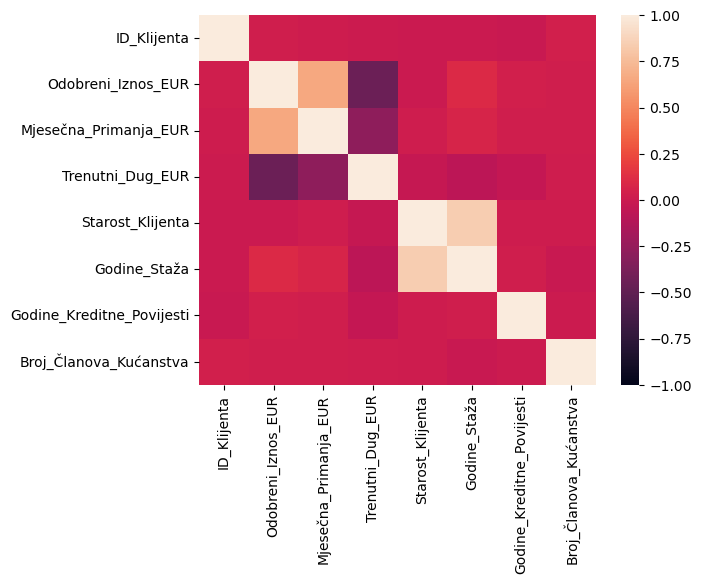

In [69]:
sns.heatmap(banka.corr(numeric_only=True), vmin=-1, vmax=1)

In [70]:
pd.set_option('future.no_silent_downcasting', True)
bankaNumeric = banka.replace({"podstanar": 1, "vlasnik": 2, "M": 1, "F": 2, "SSS": 1, "VSS": 2}).drop(labels=["Država"], axis=1)

In [71]:
bankaNumeric.corr()

,ID_Klijenta,Odobreni_Iznos_EUR,Mjesečna_Primanja_EUR,Trenutni_Dug_EUR,Starost_Klijenta,Godine_Staža,Godine_Kreditne_Povijesti,Broj_Članova_Kućanstva,Spol,Stambeni_Status,Obrazovanje
ID_Klijenta,1.000000,0.026993,0.015099,0.007750,-0.001924,-0.002074,-0.009934,0.037988,0.004211,-0.015132,0.010750
Odobreni_Iznos_EUR,0.026993,1.000000,0.656018,-0.450934,-0.007504,0.096335,0.033896,0.024678,0.001050,0.033611,0.005215
Mjesečna_Primanja_EUR,0.015099,0.656018,1.000000,-0.287107,0.018156,0.068191,0.028118,0.028688,0.002510,0.033464,0.482083
Trenutni_Dug_EUR,0.007750,-0.450934,-0.287107,1.000000,-0.025519,-0.077737,-0.034352,0.019242,-0.023285,-0.111953,-0.017228
Starost_Klijenta,-0.001924,-0.007504,0.018156,-0.025519,1.000000,0.838445,0.008949,0.008089,-0.026660,-0.006977,0.010197
Godine_Staža,-0.002074,0.096335,0.068191,-0.077737,0.838445,1.000000,0.029427,-0.011245,-0.053171,0.009513,-0.014356
Godine_Kreditne_Povijesti,-0.009934,0.033896,0.028118,-0.034352,0.008949,0.029427,1.000000,0.007037,-0.012945,-0.007374,0.005378
Broj_Članova_Kućanstva,0.037988,0.024678,0.028688,0.019242,0.008089,-0.011245,0.007037,1.000000,0.033770,0.003654,0.018325
Spol,0.004211,0.001050,0.002510,-0.023285,-0.026660,-0.053171,-0.012945,0.033770,1.000000,0.018883,-0.022146
Stambeni_Status,-0.015132,0.033611,0.033464,-0.111953,-0.006977,0.009513,-0.007374,0.003654,0.018883,1.000000,0.005821


Nakon zamjene attributivnih vrijednosti i dalje nemamo korelacija sa Odobrenim iznosom, no možemo vidjeti druge korelacije poput:
- Mjesečna primanja povezana su sa stupnjem obrazovanja
- Staž je povezan sa starošću klijenta

S obzirom da nam ova saznanja ne govore ništa o povezanosti sa iznosom odobrenog kredita, napuštamo analizu novokreiranog DataFrame-a.

([<matplotlib.patches.Wedge at 0x179693e90>,
 [Text(-0.8688328865656977, 0.6746328002861391, 'M'),
  Text(0.8688331063889201, -0.6746325171844147, 'F')])

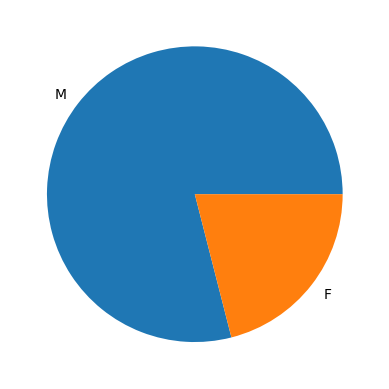

In [72]:
plt.pie(banka["Spol"].value_counts(), labels=banka["Spol"].value_counts().index.to_list())

Iz grafikona možemo vidjeti da su pretežito muškarci korisnici kredita.

([<matplotlib.patches.Wedge at 0x179709490>,
 [Text(-0.02409211900277135, 1.0997361364445366, 'SSS'),
  Text(0.024091952947234357, -1.099736140082333, 'VSS')])

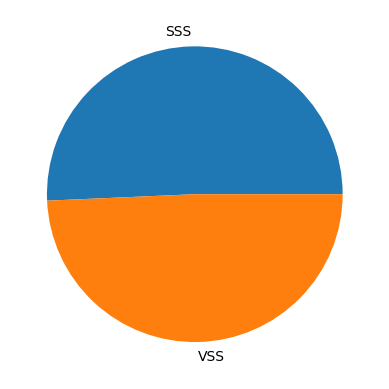

In [73]:
plt.pie(banka["Obrazovanje"].value_counts(), labels=banka["Obrazovanje"].value_counts().index.to_list())

Podaci sugeriraju da osobe višeg obrazovanja su u jednakom broju korisnici kredita kao i osobe sa srednjom stručnom spremom.

([<matplotlib.patches.Wedge at 0x17972f1d0>,
 [Text(-0.27249200619914116, 1.065714833601169, 'podstanar'),
  Text(0.27249197232378625, -1.0657148422627383, 'vlasnik')])

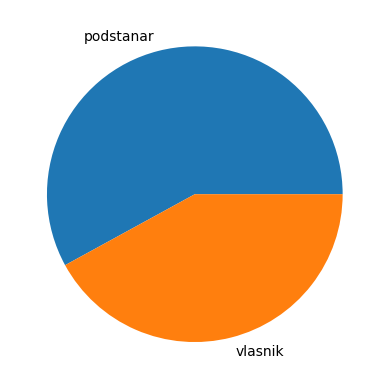

In [74]:
plt.pie(banka["Stambeni_Status"].value_counts(), labels=banka["Stambeni_Status"].value_counts().index.to_list())

Veći broj korisnika kredita su podstanari. S obzirom da smo pretpostavili da su svi iznosi veći od 40.000,00 EUR, idemo vidjeti koliko korisnika kredita ima nenamjenske kredite, a koliko stambene kredite.

In [75]:
len(banka[(banka["Stambeni_Status"] == "podstanar") & (banka["Odobreni_Iznos_EUR"] < 40000)].index)

15

In [76]:
len(banka[(banka["Stambeni_Status"] == "podstanar") & (banka["Odobreni_Iznos_EUR"] > 40000)].index)

1149

In [77]:
len(banka[(banka["Stambeni_Status"] == "vlasnik") & (banka["Odobreni_Iznos_EUR"] < 40000)].index)

4

In [78]:
len(banka[(banka["Stambeni_Status"] == "vlasnik") & (banka["Odobreni_Iznos_EUR"] > 40000)].index)

840

15 korisnika koji nemaju vlastitu nekretninu imaju nenamjenske kredite, dok 1149 podstanara ima stambene kredite. Isto tako, 4 korisnika koji su vlasnici imaju nenamjenske kredite, dok 840 vlasnika nekretnina ima stambene kredite. Što je i logično jer su moguće uzeli stambene kredite kako bi kupili nekretninu u kojoj žive. Međutim, čudno je da ima 1149 klijenata sa stambenim kreditom koji nemaju vlastitu nekretninu.

<Axes: xlabel='Mjesečna_Primanja_EUR', ylabel='Odobreni_Iznos_EUR'>

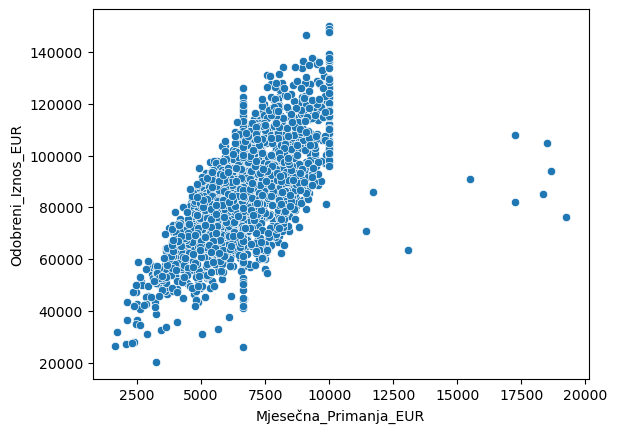

In [79]:
sns.scatterplot(x=banka["Mjesečna_Primanja_EUR"], y=banka["Odobreni_Iznos_EUR"])

<Axes: xlabel='Trenutni_Dug_EUR', ylabel='Odobreni_Iznos_EUR'>

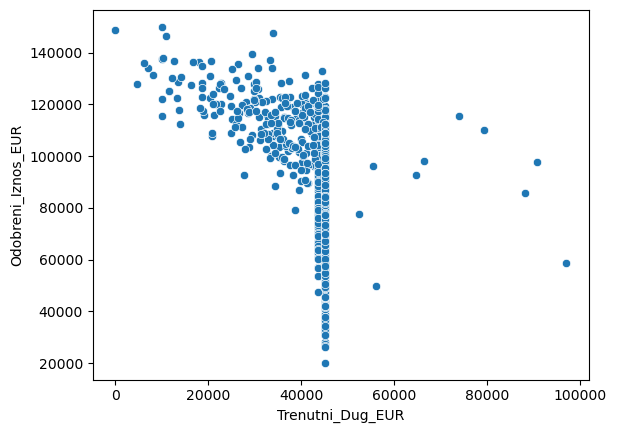

In [80]:
sns.scatterplot(x=banka["Trenutni_Dug_EUR"], y=banka["Odobreni_Iznos_EUR"])

<Axes: xlabel='Godine_Kreditne_Povijesti', ylabel='Odobreni_Iznos_EUR'>

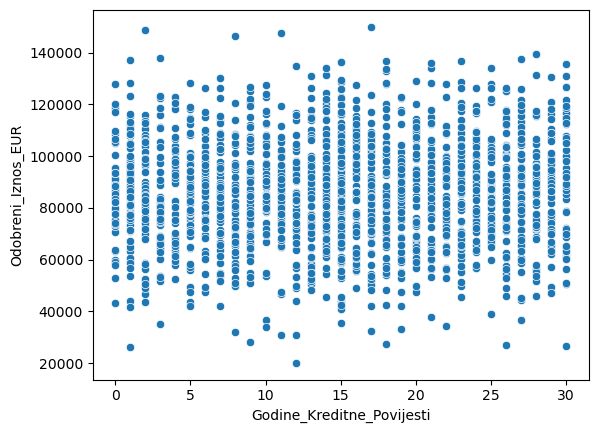

In [81]:
sns.scatterplot(x=banka["Godine_Kreditne_Povijesti"], y=banka["Odobreni_Iznos_EUR"])

<Axes: ylabel='Odobreni_Iznos_EUR'>

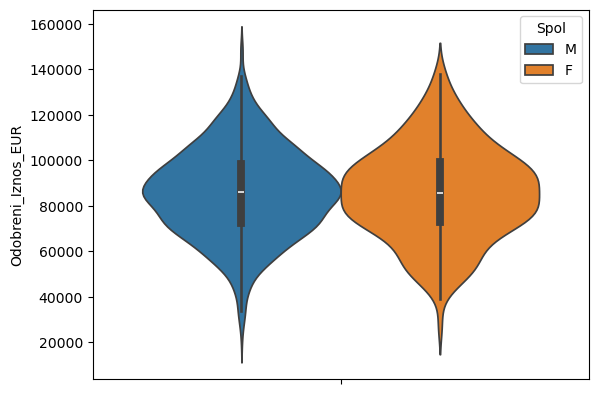

In [82]:
sns.violinplot(data=banka, y="Odobreni_Iznos_EUR", hue="Spol")

<Axes: ylabel='Odobreni_Iznos_EUR'>

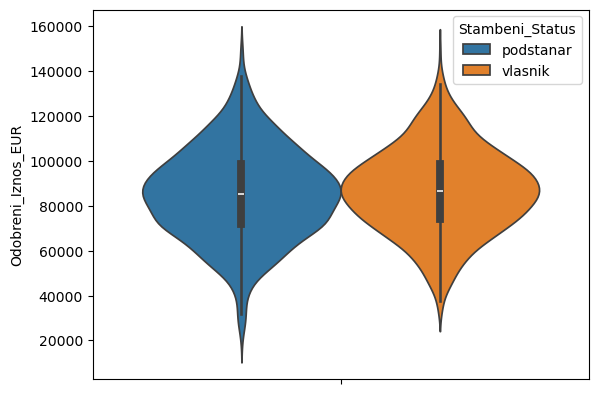

In [83]:
sns.violinplot(data=banka, y="Odobreni_Iznos_EUR", hue="Stambeni_Status")

<Axes: ylabel='Odobreni_Iznos_EUR'>

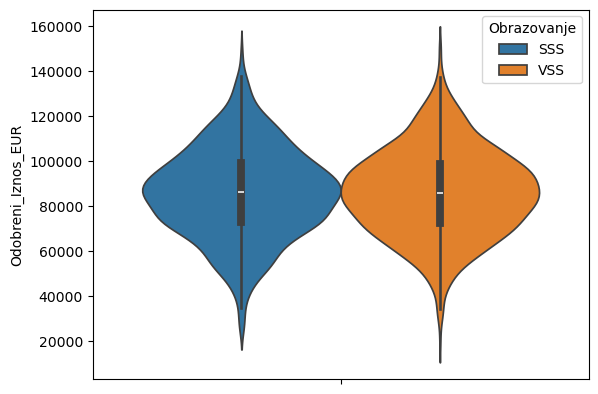

In [84]:
sns.violinplot(data=banka, y="Odobreni_Iznos_EUR", hue="Obrazovanje")

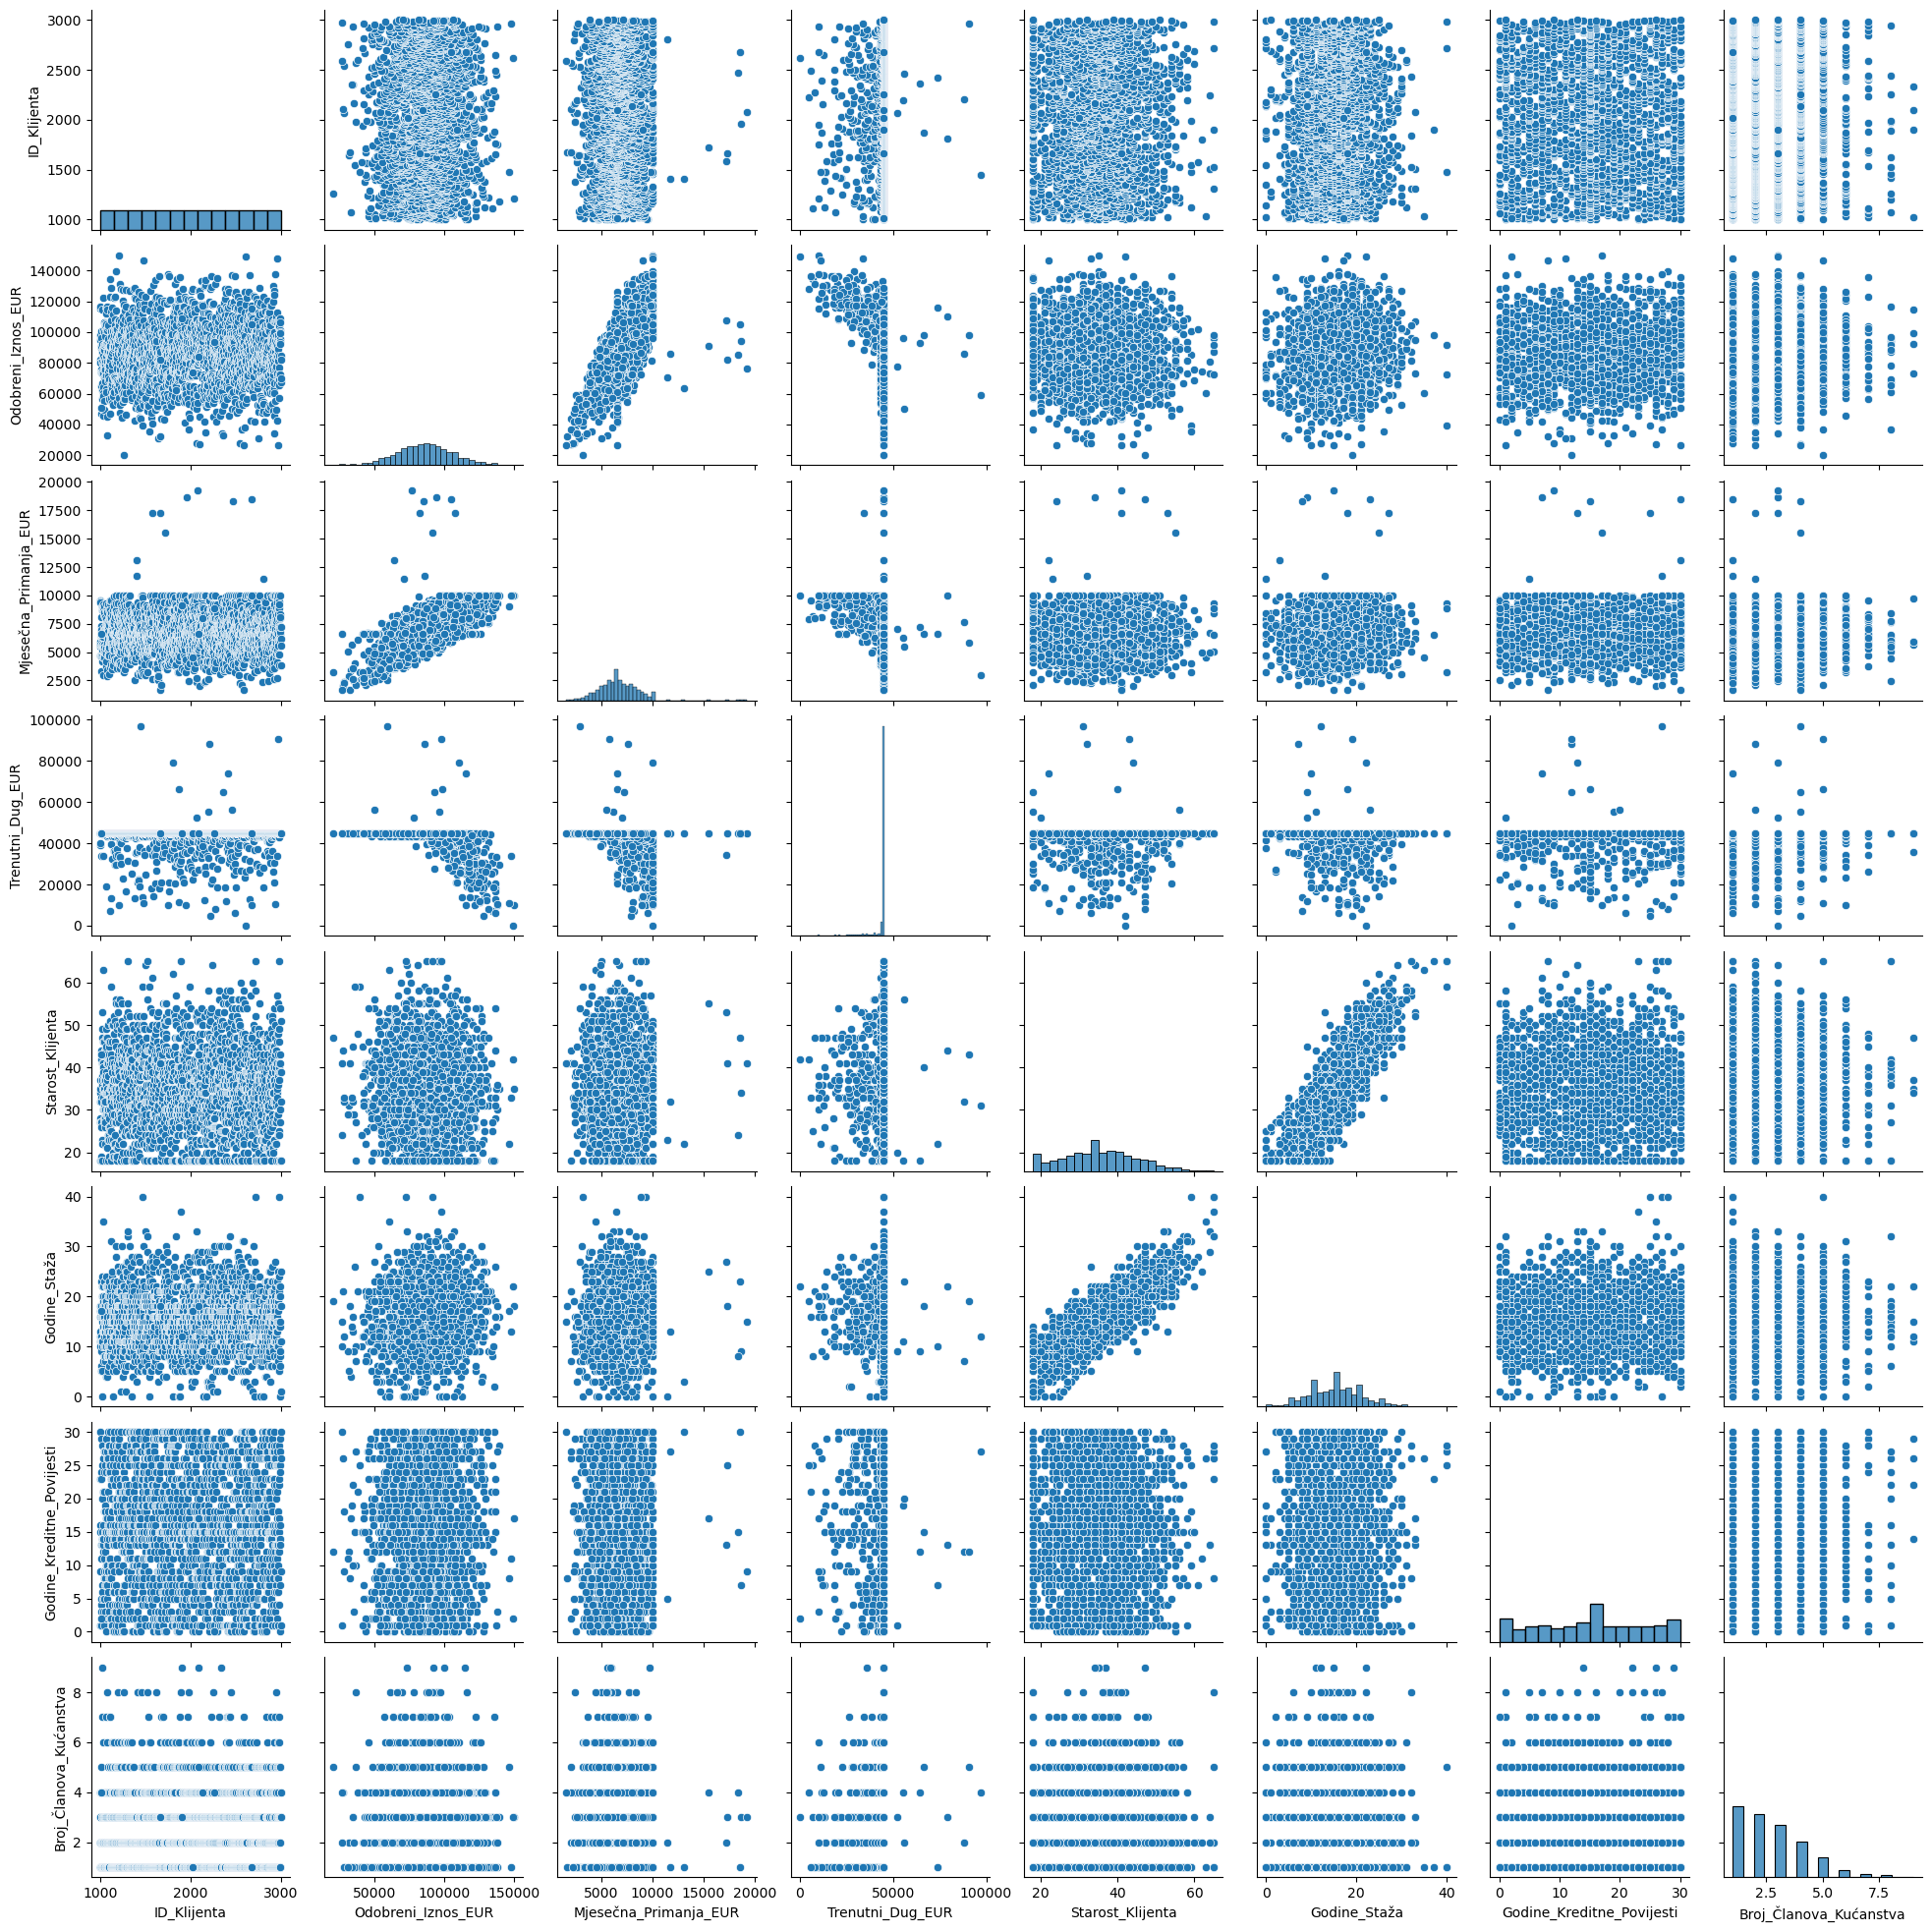

In [85]:
sns.pairplot(banka)

Iz priloženih grafikona, primjećujemo da je jedino Mjesečna_Primanja_EUR i Trenutni_Dug_EUR utječu na Odobreni_Iznos_EUR, gdje je utjecaj Mjesečnih primanja proporcionalan, tj. veća primanja znače veći iznos odobrenog kredita, dok je trenutni dug obrnuto proporcijalan, tj. veći dug znači manji iznos kredita.

## Smanjivanje dataseta
Kao što je već ranije pisano, iz data seta u startu možemo izbaciti varijablu **Država** jer su svi zapisi vezani uz Republiku Hrvatsku te nam ne može biti pokazatelj za ostvarenje kredita.

In [86]:
banka = banka.drop("Država", axis=1)

Nadalje, s obzirom da smo Stambeni_Status kod popunjavanja vrijednosti koje nedostaju izračunavali na temelju odobrenog iznosa kredita, možemo pretpostaviti da su one definitivno zavisne u nekoj mjeri te nam ne daju pouzdanost.
U datasetu bih ostavio samo **Mjesečna_Primanja_EUR** i **Trenutni_Dug_EUR** jer smo kod njih utvrdili zavisnost i direktni utjecan na iznos odobrenog kredita.